## Using Fourier Series for 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

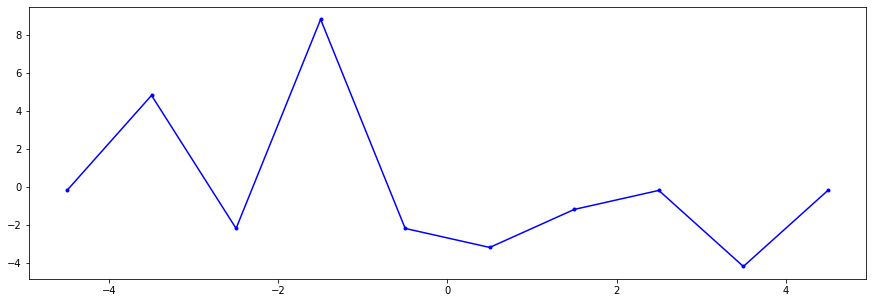

In [2]:
y = np.array([5., 10., 3., 14., 3., 2., 4., 5., 1., 5.])
x = np.arange(10)
x = x-np.mean(x)
y = y-np.mean(y)
plt.figure(figsize=(15,5))
plt.plot(x, y, 'b.-')
plt.show()

### Calculating Fourier coefficients

In [3]:
L = 0 #total length
n = 21 #21 coefficients

#coefficients for x
an = np.zeros(n)
bn = np.zeros(n)

#coefficients for y
cn = np.zeros(n)
dn = np.zeros(n)

# Arrays for storage of edge length information
dx = np.zeros(len(x))
dy = np.zeros(len(x))
dl = np.zeros(len(x))

# Arrays for storage of sccumulated length information
xj     = np.zeros(len(x))
yj     = np.zeros(len(x))
lj     = np.zeros(len(x))
lj_prev= np.zeros(len(x))

# Variables for maintaining cumulative length calculation
sum_x = 0
sum_y = 0
sum_l = 0

In [4]:
for i in range (0, len(x)):
    dx[i] = x[i] -  x[i-1]
    dy[i] = y[i] -  y[i-1]
    dl[i] = np.sqrt( dx[i]**2 + dy[i]**2 )
    
    xj[i]      = sum_x + dx[i]
    yj[i]      = sum_y + dy[i]
    lj[i]      = sum_l + dl[i]
    lj_prev[i] = sum_l
    
    sum_x = xj[i]
    sum_y = yj[i]
    sum_l = lj[i]

    L = L + dl[i]


#calculating the summation for coefficient
for i in range (0, n):
    n = i+1
    constant = L/(2*(np.pi**2.0)*(n**2.0))
    
    temp1 = dx/dl
    temp2 = dy/dl
    
    temp3 = (np.cos((2 *np.pi*n*lj)/L) - np.cos((2*np.pi*n*lj_prev)/L))
    temp4 = (np.sin((2 *np.pi*n*lj)/L) - np.sin((2*np.pi*n*lj_prev)/L))
         
    an[i] = constant*np.sum(temp1*temp3)
    bn[i] = constant*np.sum(temp1*temp4)
    
    cn[i] = constant*np.sum(temp2*temp3)
    dn[i] = constant*np.sum(temp2*temp4)

### Inverse Fourier to approximate image

In [5]:
l = np.linspace(0, L, 1000)
approx_x = np.zeros(len(l))
approx_y = np.zeros(len(l))

for i in range(len(an)):

    x_cos = an[i]*np.cos((2*np.pi*(i+1)*l)/L)
    x_sin = bn[i]*np.sin((2*np.pi*(i+1)*l)/L)
    approx_x += (x_cos + x_sin)  

    y_cos = cn[i]*np.cos((2*np.pi*(i+1)*l)/L)
    y_sin = dn[i]*np.sin((2*np.pi*(i+1)*l)/L)
    approx_y += (y_cos + y_sin)

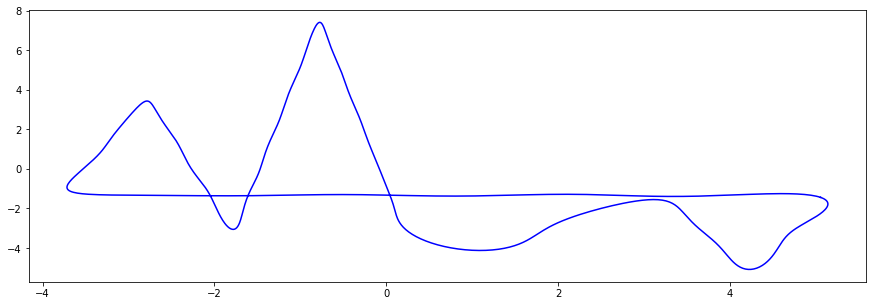

In [6]:
plt.figure(figsize=(15,5))
plt.plot(approx_x, approx_y, 'b')
plt.show()